In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as tm

# directly using tree was not working so had to import thr sklearner separately 
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import decomposition
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import metrics 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [52]:
pwd

'/Users/ssandesh/ML_Gatech/Project3'

## Dataset 1: Water Potability

In [53]:
dataset1 = pd.read_csv('datasets/water_potability.csv')
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X_1  = dataset1.iloc[:, :-1]
Y_1 =  dataset1.iloc[:, -1]
X_1 = preprocessing.scale(X_1)
num_dims = dataset1.shape[1]


In [66]:
# https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553
all_dims = np.arange(1,num_dims,1)
random_state = 7
exp_var_1 = []
print("Components | ", " Total % of variance explained | ", " Mean Squared Error" )
err_1 = []
for dim in all_dims:
    tsvd = TruncatedSVD(n_components=dim,  random_state=random_state)
    tsvd.fit_transform(X_1)
    # pca.components_ is the Eigen value and we also need the pseudo-inverse
    x_prime = tsvd.fit_transform(X_1)
    eigen_values = tsvd.components_
    A = np.linalg.pinv(eigen_values.T)
    # pojection to the reduced dimensionality space
    Z = np.dot(x_prime, A)
    err = mean_squared_error(X_1, Z)  
    err_1.append(err)
    exp_var_1.append(sum(tsvd.explained_variance_ratio_))
    print(dim, " \t\t ", sum(tsvd.explained_variance_ratio_),  "\t\t " , err )

Components |   Total % of variance explained |   Mean Squared Error
1  		  0.1341081182749985 		  0.865891881725001
2  		  0.26416119760487605 		  0.7358388023951237
3  		  0.3803743012056581 		  0.6196256987943423
4  		  0.4926585932000984 		  0.5073414067999011
5  		  0.6043295649685736 		  0.395670435031426
6  		  0.7121681653234961 		  0.2878318346765033
7  		  0.817889457169944 		  0.18211054283005573
8  		  0.9149464645537031 		  0.08505353544629654
9  		  0.9999999999999997 		  6.067080499880449e-31


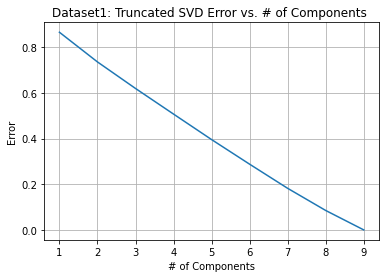

In [55]:
plt.figure()
plt.plot(all_dims,err_1)
plt.title('Dataset1: Truncated SVD Error vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Error")
plt.grid()
plt.show()

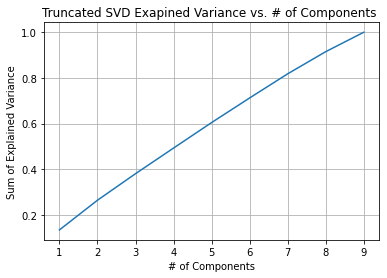

In [68]:
plt.figure()
plt.plot(all_dims,exp_var_1)
plt.title('Truncated SVD Exapined Variance vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Sum of Explained Variance")
plt.grid()
plt.show()

In [56]:
best_component_size = 8
tsvd_best_1 = TruncatedSVD(n_components=best_component_size, random_state=random_state)
X1_transform = tsvd_best_1.fit_transform(X_1)
all_new_row = np.arange(1,best_component_size,1)
X_1_df = pd.DataFrame(X_1)
for comp in all_new_row:
    col_name = "newTscvdCol"+str(comp)
    X_1_df[col_name] = X1_transform[:,comp]
    X_1_df[col_name] = X1_transform[:,comp]
X_1_df.head()

,0,1,2,3,4,5,6,7,8,newTscvdCol1,newTscvdCol2,newTscvdCol3,newTscvdCol4,newTscvdCol5,newTscvdCol6,newTscvdCol7
0,-0.526976,-0.476963,-0.936470,-0.037369,0.325351,-0.048654,-0.757973,0.711583,0.032026,0.876581,-0.580278,-0.328877,-0.489704,0.673543,-0.218381,-0.588154
1,-0.751454,0.009399,-0.291458,0.320341,-0.120292,-1.270015,1.247743,0.669251,-0.191895,0.382590,-0.321443,-0.867656,0.819401,-1.352238,-0.379390,-0.838186
2,0.108094,0.020895,2.577148,-1.179469,-1.767185,-1.267482,-1.867790,0.185041,0.724514,-1.259822,-0.877621,0.167920,0.729587,1.229677,-1.603360,0.792451
3,0.027614,-0.539300,0.454062,0.223100,-0.491370,-1.279270,0.616235,0.171513,-0.706424,0.058331,-0.376319,-0.877804,1.217561,-0.676725,-0.162394,0.405823
4,-0.281530,-0.216218,1.268086,-0.216374,0.015152,-1.114910,0.105020,0.089839,0.759427,0.286510,-0.009699,-0.014886,0.662846,-0.417963,-1.055731,0.210285


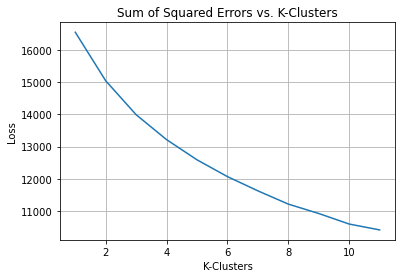

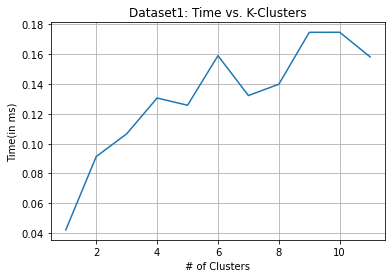

In [57]:
random_state = 7
clusters = np.arange(1,12,1)
sum_of_squared_distances_1 = []
time_array_1 = []
X_1_new = X_1_df.to_numpy()
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X1_transform)
    end_time = tm.time()
    time_array_1.append(end_time - start_time)
    sum_of_squared_distances_1.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters,sum_of_squared_distances_1)
plt.title('Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array_1)
plt.title('Dataset1: Time vs. K-Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.08904594758196732
For n_clusters = 2 The average homogeneity_score is : 4.043772672144533e-05
For n_clusters = 3 The average silhouette_score is : 0.08363803908951671
For n_clusters = 3 The average homogeneity_score is : 0.0047387741564022335
For n_clusters = 4 The average silhouette_score is : 0.08327111538546345
For n_clusters = 4 The average homogeneity_score is : 0.0019961311799233214
For n_clusters = 5 The average silhouette_score is : 0.08341907209719997
For n_clusters = 5 The average homogeneity_score is : 0.005776318601865669
For n_clusters = 6 The average silhouette_score is : 0.08367854418252027
For n_clusters = 6 The average homogeneity_score is : 0.00607613129949889
For n_clusters = 7 The average silhouette_score is : 0.08733331249991
For n_clusters = 7 The average homogeneity_score is : 0.004796764904249662
For n_clusters = 8 The average silhouette_score is : 0.08869707354926525
For n_clusters = 8 The average homogenei

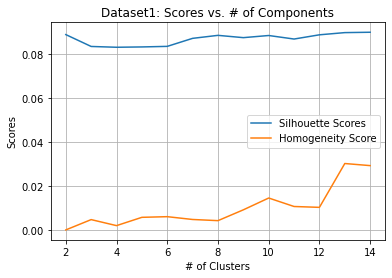

In [58]:
random_state = 7
clusters = np.arange(2,15,1)
sum_of_squared_distances_1 = []
X_1_new = X_1_df.to_numpy()
silhouette_scores_1 = []
homog_scores_1 = []
for cluster in clusters:
    clusterer = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(
        "For n_clusters =",
        cluster,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        cluster,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_1.append(silhouette_avg)
    homog_scores_1.append(homog_score)

plt.figure()
plt.plot(clusters,silhouette_scores_1, label="Silhouette Scores")
plt.plot(clusters,homog_scores_1,  label="Homogeneity Score")
plt.title('Dataset1: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Scores")
plt.legend(loc="best")
plt.grid()
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.09888224473573698
For n_clusters = 2 The average homogeneity_score is : 0.01855504049267357
For n_clusters = 3 The average silhouette_score is : 0.054596515872807894
For n_clusters = 3 The average homogeneity_score is : 0.01577571119548405
For n_clusters = 4 The average silhouette_score is : 0.04118690706083213
For n_clusters = 4 The average homogeneity_score is : 0.016284591735670692
For n_clusters = 5 The average silhouette_score is : 0.050633685224951416
For n_clusters = 5 The average homogeneity_score is : 0.014604960147193157
For n_clusters = 6 The average silhouette_score is : 0.03336466842321822
For n_clusters = 6 The average homogeneity_score is : 0.018113191223999785
For n_clusters = 7 The average silhouette_score is : 0.03080147811750257
For n_clusters = 7 The average homogeneity_score is : 0.016711763162588607
For n_clusters = 8 The average silhouette_score is : 0.030713398090086653
For n_clusters = 8 The average homogen

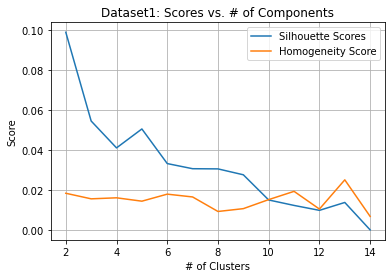

In [59]:
## Expectation Maximization
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_gmm_1 = []
homog_scores_gmm_1 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_gmm_1.append(silhouette_avg)
    homog_scores_gmm_1.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_gmm_1, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_gmm_1,  label="Homogeneity Score")
plt.title('Dataset1: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [60]:
n_clusters=np.arange(1, 12, 1)
bics_gmm_1=[]
bics_err_1=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X1_transform) 
        
        tmp_bic.append(gmm.bic(X1_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_gmm_1.append(val)
    bics_err_1.append(err)

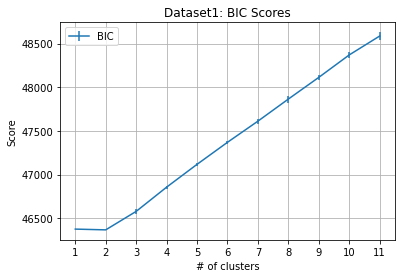

In [61]:
plt.errorbar(n_clusters,bics_gmm_1, yerr=bics_err_1, label='BIC')
plt.title("Dataset1: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()


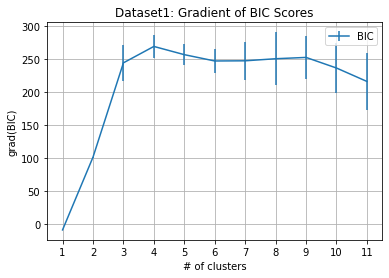

In [62]:
plt.errorbar(n_clusters, np.gradient(bics_gmm_1), yerr=bics_err_1, label='BIC')
plt.title("Dataset1: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## Dataset 2: Raisin Dataset

In [78]:
dataset2 = pd.read_excel('datasets/Raisin_Dataset.xlsx')
dataset2 = shuffle(dataset2) 
dataset2.dropna(inplace=True)
X_2 = dataset2.iloc[:, :-1]
Y_2 =  dataset2.iloc[:, -1]
X_2 = preprocessing.scale(X_2)
num_dims_2 = dataset2.shape[1]
print(num_dims_2)

8


In [81]:
all_dims = np.arange(1,num_dims_2,1)
random_state = 7
print("Components | ", " Total % of variance explained | ", " Mean Squared Error" )
err_2 = []
for dim in all_dims:
    tsvd = TruncatedSVD(n_components=dim,  random_state=random_state)
    tsvd.fit_transform(X_2)
    x_prime = tsvd.fit_transform(X_2)
    eigen_values = tsvd.components_
    A = np.linalg.pinv(eigen_values.T)
    Z = np.dot(x_prime, A)
    err = mean_squared_error(X_2, Z)  
    err_2.append(err)
    print(dim, " \t\t ", sum(tsvd.explained_variance_ratio_),  "\t\t " , err )

Components |   Total % of variance explained |   Mean Squared Error
1  		  0.6903269444053379 		  0.3096730555946622
2  		  0.8979252929009315 		  0.10207470709906785
3  		  0.9877037883182928 		  0.01229621168170555
4  		  0.9958215757983586 		  0.004178424201639999
5  		  0.9989370427358704 		  0.0010629572641279728
6  		  0.9998556414657359 		  0.00014435853426292172
7  		  0.9999999999999997 		  8.084793989343271e-32


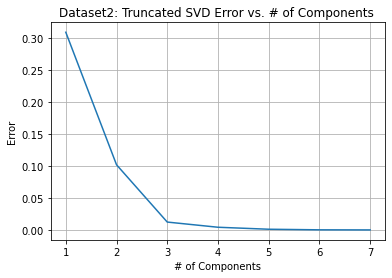

In [82]:
plt.figure()
plt.plot(all_dims,err_2)
plt.title('Dataset2: Truncated SVD Error vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Error")
plt.grid()
plt.show()

In [83]:
best_component_size = 4
tsvd_best_2 = TruncatedSVD(n_components=best_component_size, random_state=random_state)
X2_transform = tsvd_best_2.fit_transform(X_2)
all_new_row = np.arange(1,best_component_size,1)
X_2_df = pd.DataFrame(X_2)
for comp in all_new_row:
    col_name = "newPCACol"+str(comp)
    X_2_df[col_name] = X2_transform[:,comp]
    X_2_df[col_name] = X2_transform[:,comp]
X_2_df.head()

,0,1,2,3,4,5,6,newPCACol1,newPCACol2,newPCACol3
0,0.101586,0.024474,0.316205,0.006542,0.056297,-0.123195,-0.003007,-0.045829,0.160730,-0.220666
1,2.311720,1.300155,2.802911,-0.517118,2.212843,0.705462,1.760150,-2.062067,0.511320,-0.432349
2,2.693938,2.591262,1.653571,1.173426,2.586469,0.652921,2.330961,-0.444724,-0.872793,0.406806
3,0.853579,0.778310,0.953162,0.369148,0.850866,0.655040,0.866688,-0.606741,-0.490485,-0.078488
4,-0.648482,-0.635720,-0.512903,-0.152375,-0.618262,0.145958,-0.582242,0.024551,-0.120237,-0.057854


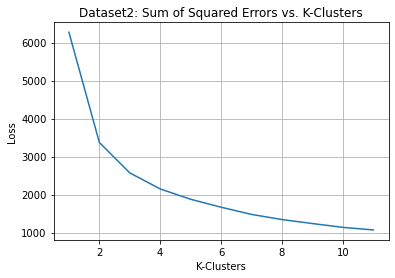

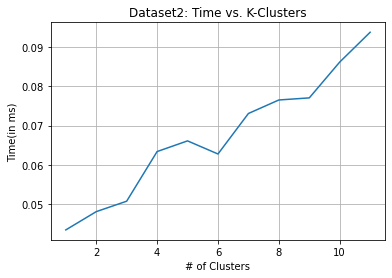

In [84]:
random_state = 7
clusters = np.arange(1,12,1)
sum_of_squared_distances_2 = []
time_array_2 = []
X_2_new = X_2_df.to_numpy()
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X2_transform)
    end_time = tm.time()
    time_array_2.append(end_time - start_time)
    sum_of_squared_distances_2.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters,sum_of_squared_distances_2)
plt.title('Dataset2: Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array_2)
plt.title('Dataset2: Time vs. K-Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2751864973562649
For n_clusters = 2 The average homogeneity_score is : 0.30349364151503555
For n_clusters = 3 The average silhouette_score is : 0.18983116621504084
For n_clusters = 3 The average homogeneity_score is : 0.28583533747959705
For n_clusters = 4 The average silhouette_score is : 0.16055218788455694
For n_clusters = 4 The average homogeneity_score is : 0.3341169922061752
For n_clusters = 5 The average silhouette_score is : 0.12426823215695829
For n_clusters = 5 The average homogeneity_score is : 0.3897757938254352
For n_clusters = 6 The average silhouette_score is : 0.10928363580382666
For n_clusters = 6 The average homogeneity_score is : 0.39177841976907596
For n_clusters = 7 The average silhouette_score is : 0.05684898078527134
For n_clusters = 7 The average homogeneity_score is : 0.3871933563453051
For n_clusters = 8 The average silhouette_score is : 0.0872541390442741
For n_clusters = 8 The average homogeneity_score i

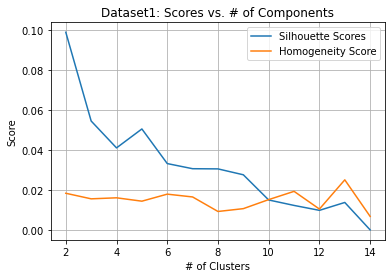

In [85]:
## Expectation Maximization
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_gmm_2 = []
homog_scores_gmm_2 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X2_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_transform, cluster_labels)
    homog_score = homogeneity_score(Y_2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_gmm_2.append(silhouette_avg)
    homog_scores_gmm_2.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_gmm_1, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_gmm_1,  label="Homogeneity Score")
plt.title('Dataset1: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [75]:
n_clusters=np.arange(1, 12, 1)
bics_gmm_2=[]
bics_err_2=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X2_transform) 
        
        tmp_bic.append(gmm.bic(X2_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_gmm_2.append(val)
    bics_err_2.append(err)

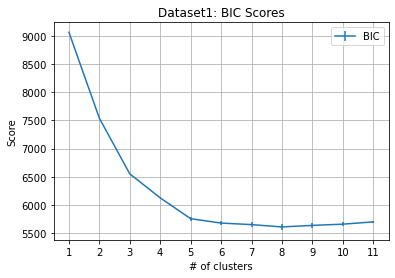

In [76]:
plt.errorbar(n_clusters,bics_gmm_2, yerr=bics_err_2, label='BIC')
plt.title("Dataset1: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()


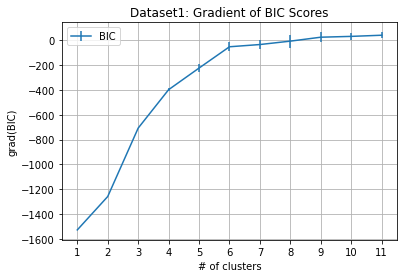

In [77]:
plt.errorbar(n_clusters, np.gradient(bics_gmm_2), yerr=bics_err_2, label='BIC')
plt.title("Dataset1: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## Neural Network


In [87]:
X_train, X_test, y_train, y_test = train_test_split( X1_transform, Y_1, test_size=0.20, random_state=7)

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

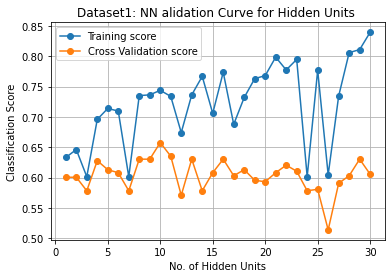

In [91]:
#hyperparameter tuning
hidden_unit_size = 30
test_data = np.zeros(hidden_unit_size)
train_data = np.zeros(hidden_unit_size)
hidden_layers = list(range(1, hidden_unit_size+1)) 

for i in hidden_layers:
    clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(i,2), random_state=7)
    clf_NN.fit(X_train,y_train)
    y_pred = clf_NN.predict(X_test)
    y_pred_train = clf_NN.predict(X_train)
    test_data[i-1] = metrics.accuracy_score(y_test, y_pred)
    train_data[i-1] = metrics.accuracy_score(y_train, y_pred_train)

plt.figure()
plt.plot(hidden_layers,train_data ,'o-', label='Training score')
plt.plot(hidden_layers,test_data ,'o-', label='Cross Validation score')
plt.title('Dataset1: NN alidation Curve for Hidden Units ')
plt.xlabel('No. of Hidden Units')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

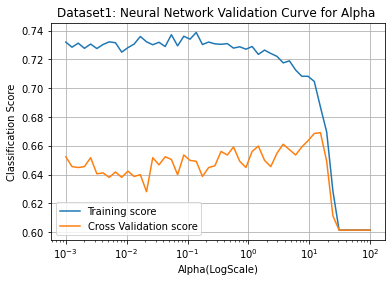

In [92]:
# Two hyperparameter to tune are the Learning Rate and numeber of hidden perceptrons hidden_layer_sizes
cv = StratifiedKFold(n_splits=5)
alpha_val = np.logspace(-3, 2, 50)
clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(8,2), random_state=7)
train_scores, test_scores = validation_curve(clf_NN, X_train, y_train, param_name="alpha",
                                             param_range=alpha_val, cv=cv, n_jobs=-1)

plt.figure()
plt.semilogx(alpha_val, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_val, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: Neural Network Validation Curve for Alpha ')
plt.xlabel('Alpha(LogScale)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
#plt.ticklabel_format(useOffset=False)
plt.show()

Fit time with reduced features = 0.1495649814605713
Fit time with Clusttering and reduced features = 0.0008423328399658203
64.01985111662532


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

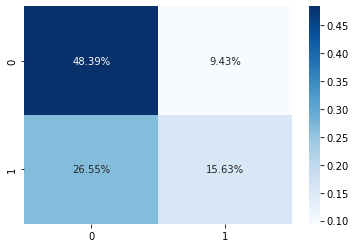

In [100]:
best_hidden_layers=(8,2)
best_alpha=0.01
clf_NN_best= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best.fit(X_train,y_train)
t_after = tm.time()
print('Fit time with reduced features =',  t_after - t_before)
t_before = tm.time()
y_pred = clf_NN_best.predict(X_test)
t_after = tm.time()
#inference_time[4] = t_after - t_before
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print('Fit time with Clusttering and reduced features =',  t_after - t_before)
print(metrics.accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


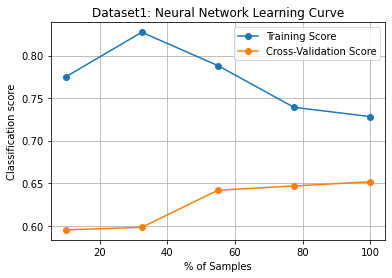

In [96]:
cv = StratifiedKFold(n_splits=5)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_NN_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Neural Network Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

In [97]:
# After clusterring and adding features

In [98]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split( X_1_new , Y_1, test_size=0.20, random_state=7)

time with Clusttering and added new features = 0.15261507034301758
Inferece time with Clusttering and added new features = 0.0007457733154296875
67.24565756823822


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

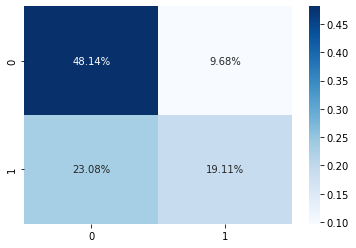

In [99]:
best_hidden_layers=(8,2)
best_alpha=0.02
clf_NN_best_c= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best_c.fit(X_train_c,y_train_c)
t_after = tm.time()
print('time with Clusttering and added new features =',  t_after - t_before)
t_before = tm.time()
y_pred_c = clf_NN_best_c.predict(X_test_c)
t_after = tm.time()
print('Inferece time with Clusttering and added new features =',  t_after - t_before)
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print(metrics.accuracy_score(y_test_c, y_pred_c)*100)
cm=confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

